In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from nltk.corpus import words as english_words
import string
import re
from sklearn.model_selection import learning_curve
nltk.download('punkt')
nltk.download('words')


[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1076)>


False

In [4]:
df = pd.read_csv("/Users/kenneth/Desktop/ML-project/training_set_rel3.tsv", delimiter='\t', encoding='latin1')
test_data = pd.read_csv("/Users/kenneth/Desktop/ML-project/test_set.tsv", delimiter='\t', encoding='latin1')
validation_data = pd.read_csv("/Users/kenneth/Desktop/ML-project/valid_set.tsv", delimiter='\t', encoding='latin1')
v1 = pd.read_csv('/Users/kenneth/Desktop/ML-project/valid_sample_submission_2_column.csv', header=1,names=['prediction_id', 'predicted_score'])
validation_data


,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN
...,...,...,...,...,...
4213,21933,8,Have you ever noticed that if two little kids...,24933,NaN
4214,21934,8,Laughter @CAPS1 I ...,24934,NaN
4215,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,NaN
4216,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,NaN


In [5]:
validation_data = pd.merge(v1, validation_data, left_on='prediction_id', right_on='domain1_predictionid')
validation_data

,prediction_id,predicted_score,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1789,8,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
1,1790,9,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
2,1791,9,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
3,1792,9,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN
4,1793,9,1793,1,"Dear local newspaper, @CAPS1 the caveman found...",1793,NaN
...,...,...,...,...,...,...,...
4212,24933,33,21933,8,Have you ever noticed that if two little kids...,24933,NaN
4213,24934,35,21934,8,Laughter @CAPS1 I ...,24934,NaN
4214,24935,38,21935,8,Laughter in @CAPS1 A laugh is not just an act...,24935,NaN
4215,24937,32,21937,8,LAUGHTER @CAPS1 i was younger my friend live...,24937,NaN


In [6]:
X = df['essay']
y = df['domain1_score']
vectorizer = TfidfVectorizer(max_features=10)

X_train= vectorizer.fit_transform(X)
X_test = vectorizer.transform(validation_data['essay'])
y_train = y
y_test = validation_data['predicted_score']

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score = model.score(X_train, y_train)
    print('----------------------')
    print("Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R²: {r2}")
    print(f"SCORE: {score}%")
    print('----------------------\n')


Evaluating Linear Regression...
----------------------
Metrics:
MSE: 55.931640014480536
RMSE: 7.4787458851388005
R²: 0.2776341226587401
SCORE: 0.2977183363384066%
----------------------

Evaluating Ridge Regression...
----------------------
Metrics:
MSE: 55.92100012223205
RMSE: 7.478034509296681
R²: 0.2777715385309889
SCORE: 0.2977093858673334%
----------------------

Evaluating Lasso Regression...
----------------------
Metrics:
MSE: 77.4496520975051
RMSE: 8.800548397543478
R²: -0.0002743683665471508
SCORE: 0.0%
----------------------

Evaluating Decision Tree...
----------------------
Metrics:
MSE: 82.14974415724713
RMSE: 9.063649604725853
R²: -0.06097679231551845
SCORE: 0.9997407925171291%
----------------------

Evaluating Support Vector Machine...
----------------------
Metrics:
MSE: 50.02844522870975
RMSE: 7.073078907287105
R²: 0.35387480645481084
SCORE: 0.37351076799697025%
----------------------

Evaluating K-Nearest Neighbors...
----------------------
Metrics:
MSE: 50.11014465

In [7]:
moyenne_par_categorie = df.groupby('essay_set').size().mean()
taille_exacte_8 = len(df[df['essay_set'] == 8])
reste = int(moyenne_par_categorie - taille_exacte_8)
duplique1 = df[df['essay_set'] == 8].sample(n=reste, replace=True)
df2 = pd.concat([df, duplique1])
df2 = df2.sample(frac=1, random_state=42)
print(df2['essay_set'].value_counts())

5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
8    1622
7    1569
Name: essay_set, dtype: int64


Calcul de la moyenne de la taille des groupes par catégorie : Il calcule la moyenne du nombre d'éléments dans chaque catégorie d'essay_set.

Calcul de la taille exacte du groupe avec 'essay_set' égal à 8 : Il détermine le nombre exact d'éléments dans le groupe ayant 'essay_set' égal à 8.

Calcul du nombre d'éléments supplémentaires nécessaires : Il détermine la différence entre la moyenne de la taille des groupes par catégorie et la taille exacte du groupe ayant 'essay_set' égal à 8. Cela donne le nombre d'éléments supplémentaires nécessaires pour que la taille du groupe 8 soit égale à la moyenne.

Duplication aléatoire d'éléments pour le groupe 8 : Il sélectionne aléatoirement un échantillon d'éléments du groupe ayant 'essay_set' égal à 8 et le duplique pour atteindre le nombre d'éléments supplémentaires nécessaires calculé précédemment.

Concaténation des données dupliquées avec le DataFrame original : Il ajoute les éléments dupliqués au DataFrame original.
Mélange aléatoire des données : Il mélange aléatoirement toutes les lignes du DataFrame, ce qui réorganise l'ordre des éléments.

Impression du décompte du nombre d'éléments par catégorie : Il imprime le nombre d'éléments dans chaque catégorie d'essay_set après les manipulations effectuées précédemment.

En résumé, ce code semble ajuster la taille du groupe ayant 'essay_set' égal à 8 dans le DataFrame en ajoutant des éléments supplémentaires de manière aléatoire pour qu'elle corresponde à la moyenne de la taille des groupes par catégorie, puis il mélange les données et imprime le nombre d'éléments dans chaque catégorie.

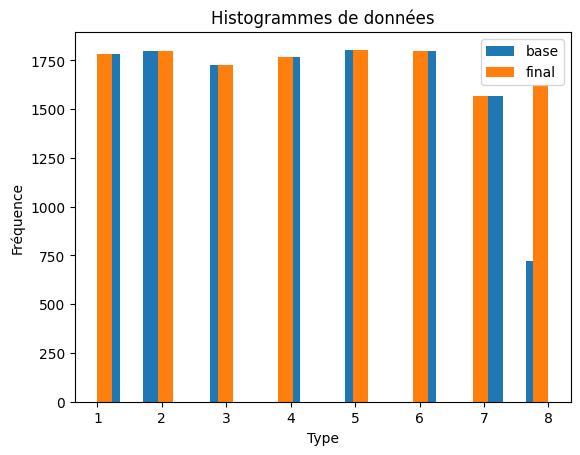

In [8]:
plt.hist(df['essay_set'], bins=20, alpha=1, label='base')
plt.hist(df2['essay_set'], bins=30, alpha=1, label='final')
plt.title('Histogrammes de données')
plt.xlabel('Type')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


En résumé, ce script trace deux histogrammes montrant la distribution des valeurs de la colonne 'essay_set' avant (avec l'étiquette 'base') et après (avec l'étiquette 'final') les manipulations effectuées sur le DataFrame. Cela permet de visualiser visuellement les changements dans la distribution des données après les manipulation

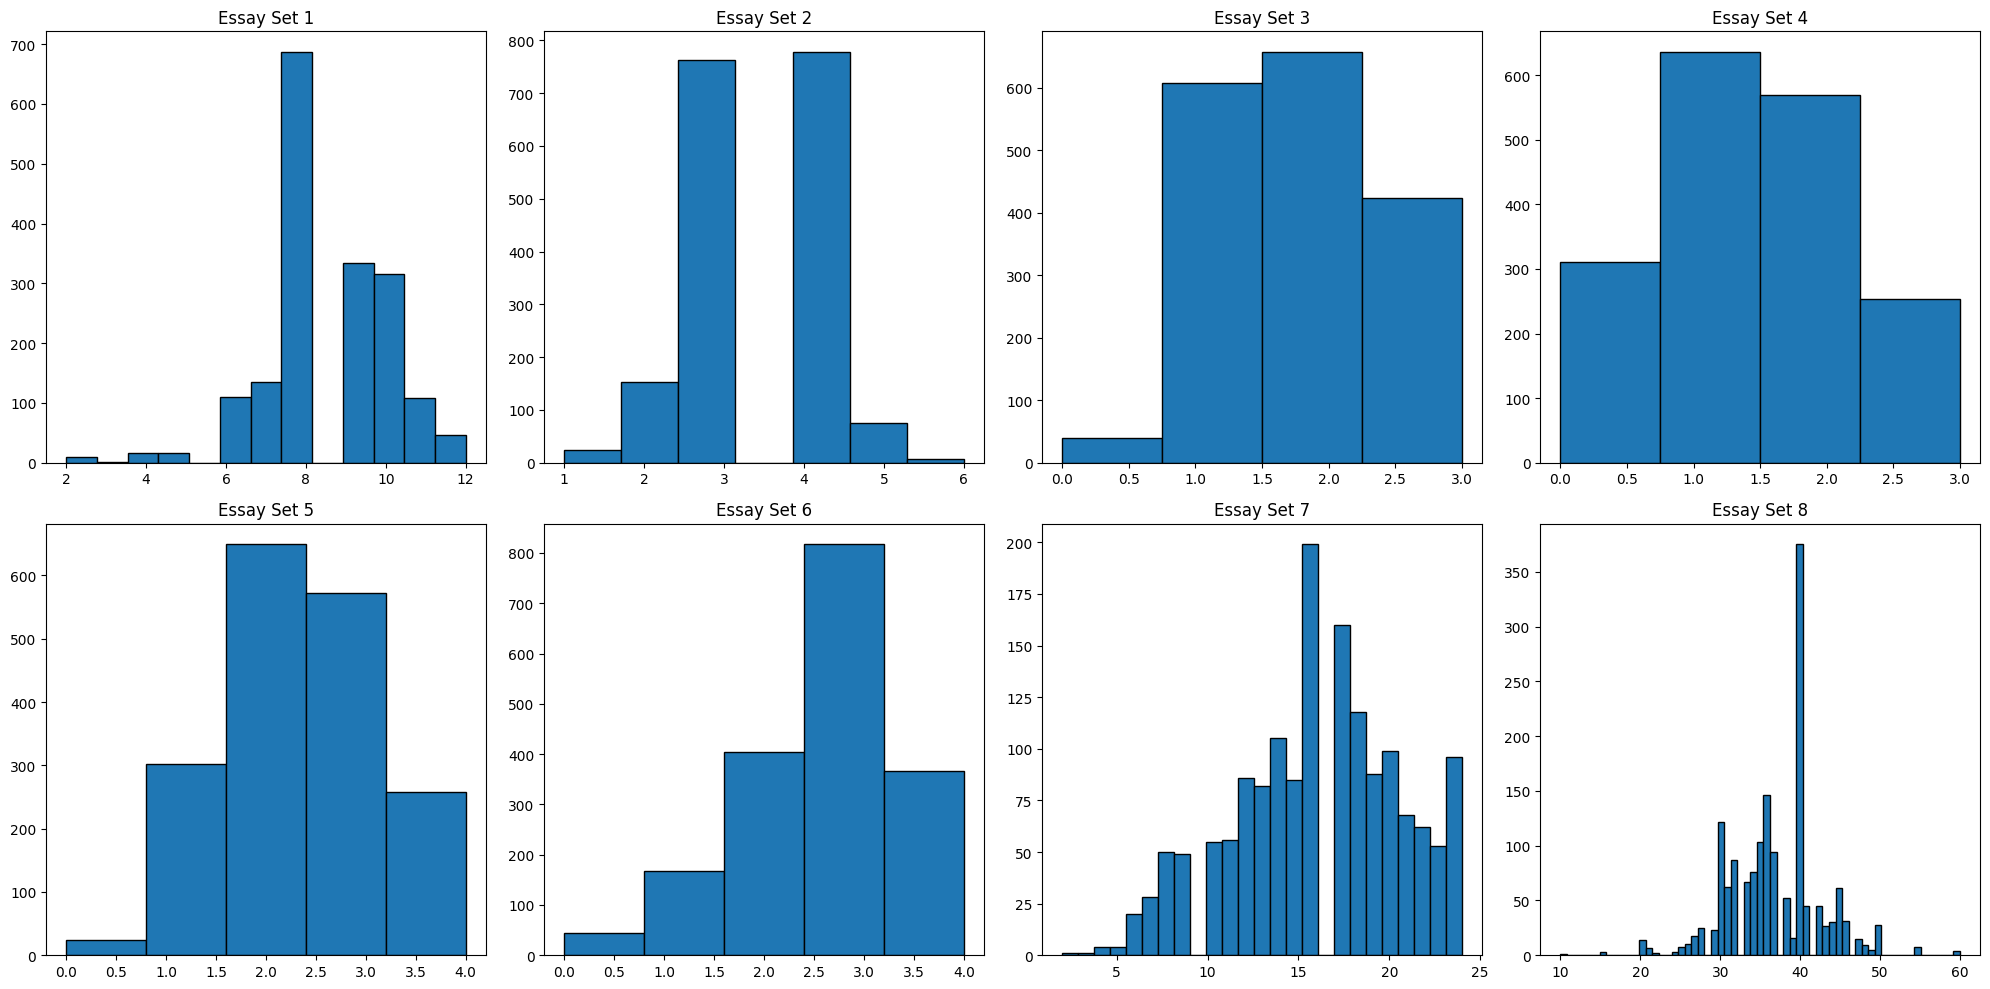

In [9]:
max_scores = df2.groupby('essay_set')['domain1_score'].max()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, essay_set_value in enumerate(range(1, 9)):
    ax = axs[i // 4, i % 4]
    ax.hist(df2['domain1_score'][df2['essay_set'] == essay_set_value], bins=(max_scores[essay_set_value])+1, edgecolor='black')
    ax.set_title(f"Essay Set {essay_set_value}")
plt.tight_layout()
plt.show()

En résumé, ce script crée une figure avec 8 sous-graphiques, chacun montrant un histogramme des scores pour un ensemble d'essais spécifique dans le DataFrame df2. Cela permet de visualiser la distribution des scores pour chaque ensemble d'essais.

In [10]:
def overSamplerSousCategorie(data, colonneDuType):
    over_sampler = RandomOverSampler(random_state=42)
    df_resampled = pd.DataFrame()
    for essay_set_value in data[colonneDuType].unique():
        data_subset = data[data[colonneDuType] == essay_set_value]
        X = data_subset.drop('domain1_score', axis=1)
        y = data_subset['domain1_score']
        X_resampled, y_resampled = over_sampler.fit_resample(X, y)
        df_resampled_subset = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='domain1_score')], axis=1)
        df_resampled = pd.concat([df_resampled, df_resampled_subset], ignore_index=True)
    return df_resampled

df3 = overSamplerSousCategorie(df2, 'essay_set')


Ce code effectue une opération de suréchantillonnage aléatoire des données pour chaque sous-catégorie d'essais (définie par la colonne 'essay_set') dans un DataFrame. Voici ce qu'il fait en gros :

Importe les bibliothèques nécessaires : imblearn.over_sampling.RandomOverSampler pour le suréchantillonnage aléatoire et pandas pour manipuler les données sous forme de DataFrame.

Définit une fonction appelée overSamplerSousCategorie qui prend deux paramètres : le DataFrame data contenant les données à échantillonner et le nom de la colonne colonneDuType indiquant la sous-catégorie à échantillonner.
Initialise un objet RandomOverSampler pour effectuer le suréchantillonnage aléatoire.

Crée un DataFrame vide pour stocker les données échantillonnées.

Parcourt chaque valeur unique de la colonne spécifiée par colonneDuType dans le DataFrame data.
Sélectionne un sous-ensemble de données où la colonne spécifiée par colonneDuType est égale à la valeur actuelle.
Sépare les caractéristiques et la cible du sous-ensemble de données.

Utilise la méthode fit_resample de l'objet RandomOverSampler pour effectuer le suréchantillonnage aléatoire des caractéristiques et de la cible.

Crée un nouveau DataFrame à partir des caractéristiques et de la cible échantillonnées.
Ajoute ce DataFrame échantillonné au DataFrame global.

Retourne le DataFrame global avec les données échantillonnées pour toutes les sous-catégories.

Enfin, il appelle cette fonction avec un DataFrame spécifique df2 et la colonne 'essay_set', stocke le DataFrame échantillonné résultant dans df3.

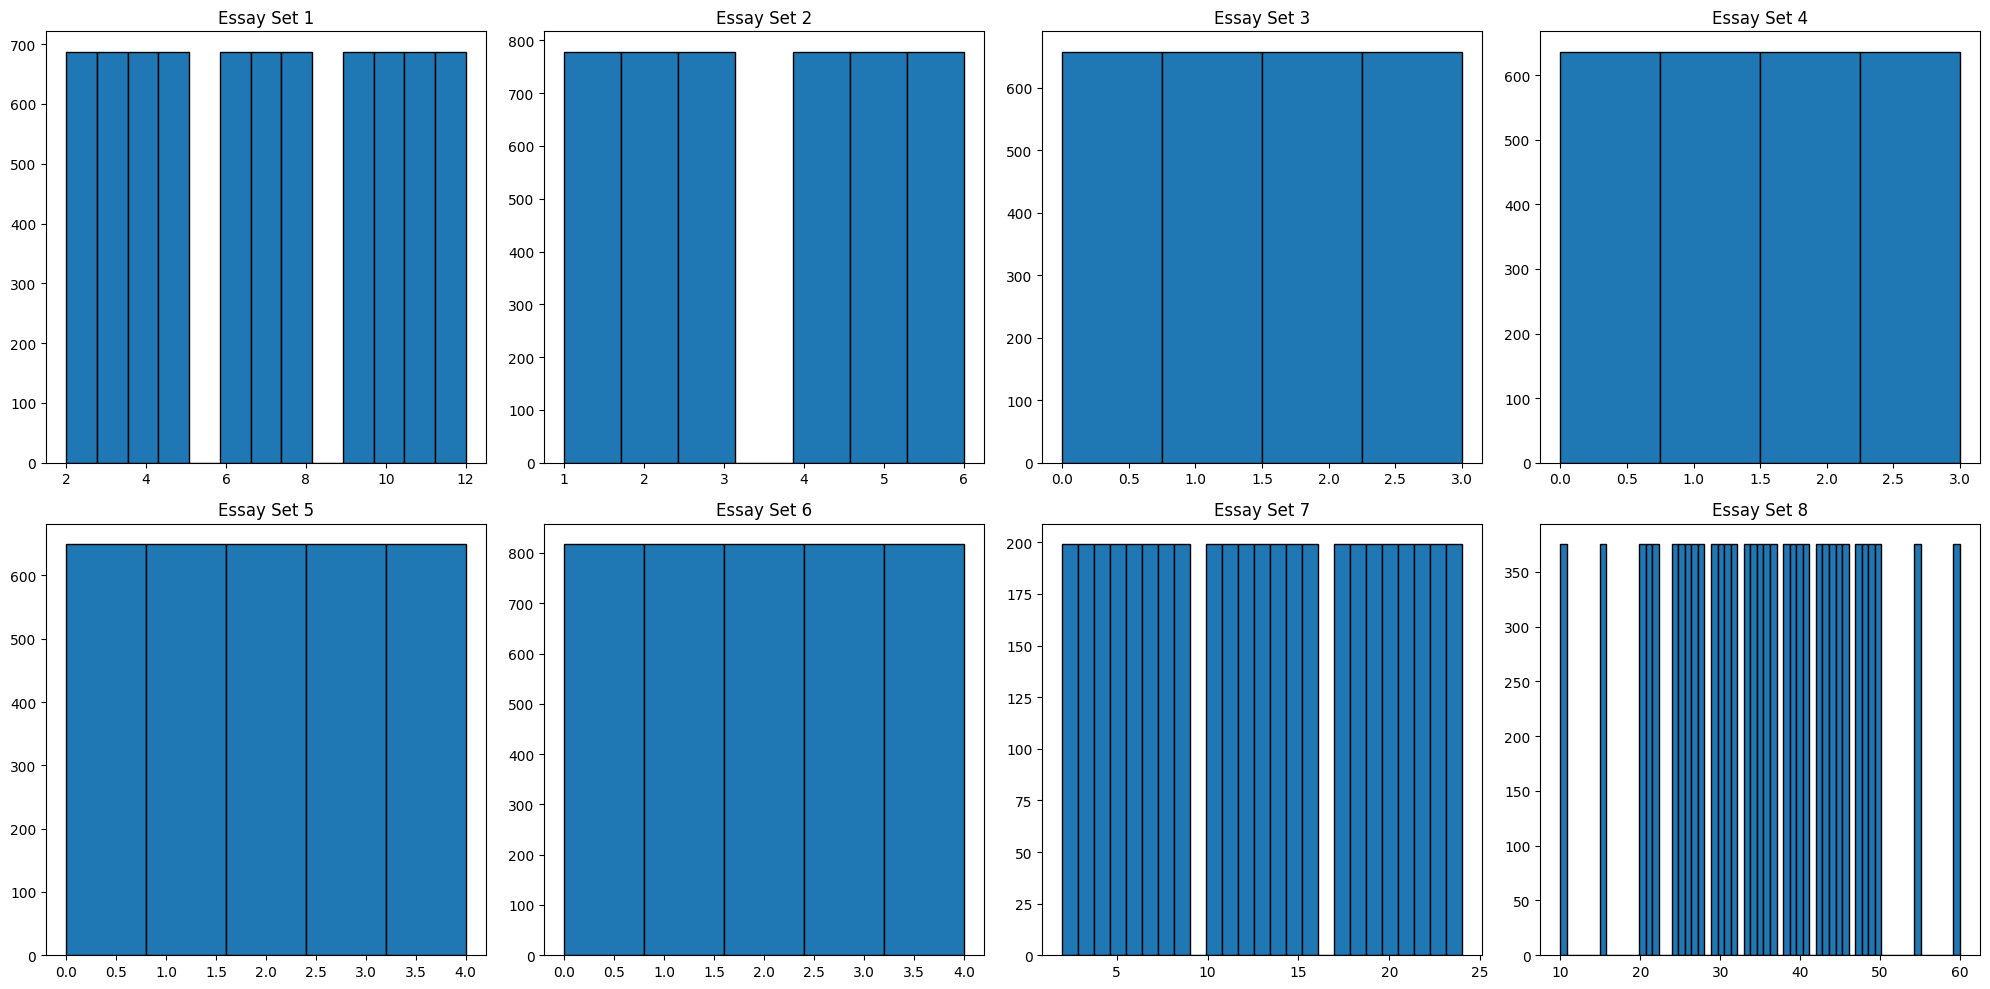

In [11]:
max_scores = df3.groupby('essay_set')['domain1_score'].max()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, essay_set_value in enumerate(range(1, 9)):
    ax = axs[i // 4, i % 4]
    ax.hist(df3['domain1_score'][df3['essay_set'] == essay_set_value], bins=(max_scores[essay_set_value])+1, edgecolor='black')
    ax.set_title(f"Essay Set {essay_set_value}")
plt.tight_layout()
plt.show()

ce script crée une figure avec 8 sous-graphiques, chacun montrant un histogramme des scores pour un ensemble d'essais spécifique dans le DataFrame df3, qui est le résultat du suréchantillonnage des données. Cela permet de visualiser la distribution des scores pour chaque ensemble d'essais après le suréchantillonnage.

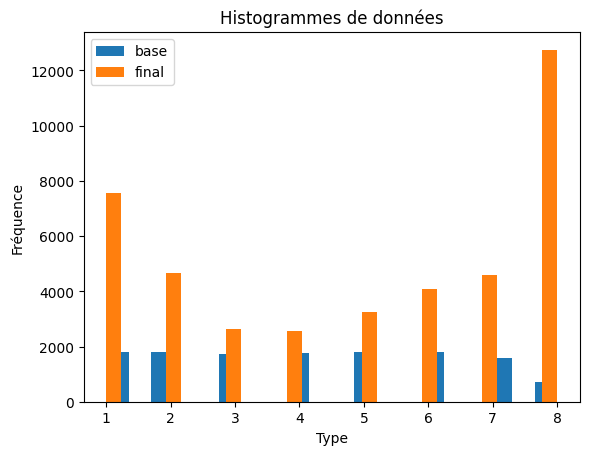

In [12]:
plt.hist(df['essay_set'], bins=20, alpha=1, label='base')
plt.hist(df3['essay_set'], bins=30, alpha=1, label='final')
plt.title('Histogrammes de données')
plt.xlabel('Type')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

ce script trace deux histogrammes montrant la distribution des valeurs de la colonne 'essay_set' avant (avec l'étiquette 'base') et après (avec l'étiquette 'final') le suréchantillonnage des données. Cela permet de visualiser visuellement les changements dans la distribution des données après le suréchantillonnage.

In [13]:
# Créez une fonction pour équilibrer les catégories de notes
def equilibrer_categories(df, essay_set, random_seed=42):

    # Obtenez les catégories uniques
    categories = df[essay_set].unique()    
    # Initialisez une liste pour stocker les données équilibrées
    dataframe_equilibree = []
    mean_echantillon = int(df.groupby(essay_set).size().mean())
    
    # Équilibrez chaque catégorie
    for cat in categories:
        cat_data = df[df[essay_set] == cat]
        # Utiliser replace=True pour permettre l'échantillonnage de plus d'éléments que ceux présents dans la population
        dataframe_equilibree.append(cat_data.sample(mean_echantillon, replace=True, random_state=random_seed))
    
    dataframe_equilibree = pd.concat(dataframe_equilibree)
    dataframe_equilibree = dataframe_equilibree.sample(frac=1, random_state=random_seed)
    return dataframe_equilibree
df4 = equilibrer_categories(df3, 'essay_set')
print(df4['essay_set'].value_counts())

3    5256
2    5256
5    5256
1    5256
6    5256
8    5256
7    5256
4    5256
Name: essay_set, dtype: int64


Ce script crée une fonction appelée equilibrer_categories qui équilibre les catégories de notes dans un DataFrame en échantillonnant aléatoirement des données pour chaque catégorie. Voici ce qu'il fait en gros :
Définition de la fonction : La fonction equilibrer_categories prend trois paramètres : le DataFrame initial (df), le nom de la colonne contenant les catégories (essay_set), et une valeur de graine aléatoire pour assurer la reproductibilité des résultats (random_seed=42).

Récupération des catégories uniques : Le script récupère toutes les catégories uniques de la colonne spécifiée par essay_set dans le DataFrame.

Initialisation d'une liste vide : Une liste vide appelée dataframe_equilibree est initialisée pour stocker les données équilibrées.

Calcul de la taille moyenne de l'échantillon : Le script calcule la taille moyenne de l'échantillon pour chaque catégorie en prenant la moyenne du nombre d'éléments dans chaque catégorie.
Boucle sur chaque catégorie : Pour chaque catégorie unique, le script sélectionne les données correspondantes et échantillonne aléatoirement des données avec remplacement pour obtenir une taille d'échantillon égale à la taille moyenne calculée précédemment. Ces échantillons sont ajoutés à la liste dataframe_equilibree.
Concaténation des échantillons : Une fois que tous les échantillons équilibrés ont été obtenus, ils sont concaténés dans une seule DataFrame.

Mélange des données : Les données sont mélangées pour garantir qu'elles sont bien réparties.
Retour de la DataFrame équilibrée : La fonction retourne la DataFrame équilibrée.
Appel de la fonction : La fonction est appelée avec le DataFrame df3 et la colonne 'essay_set', et le résultat équilibré est stocké dans df4.

Affichage du décompte des catégories : Le décompte du nombre d'éléments pour chaque valeur unique de la colonne 'essay_set' dans la DataFrame équilibrée df4 est affiché pour vérifier que les catégories sont maintenant équilibrées.

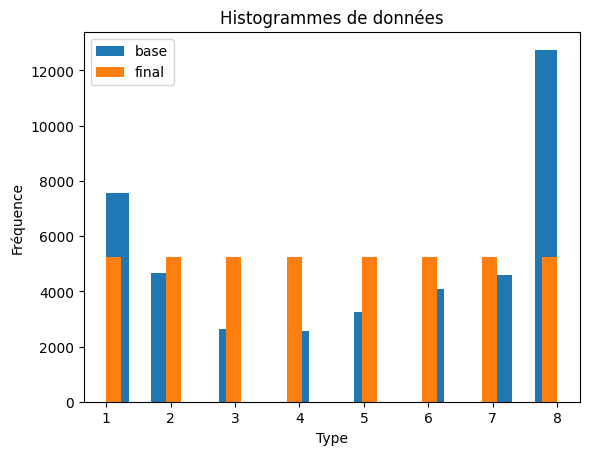

In [14]:
plt.hist(df3['essay_set'], bins=20, alpha=1, label='base')
plt.hist(df4['essay_set'], bins=30, alpha=1, label='final')
plt.title('Histogrammes de données')
plt.xlabel('Type')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

ce script trace deux histogrammes montrant la distribution des valeurs de la colonne 'essay_set' avant (avec l'étiquette 'base') et après (avec l'étiquette 'final') l'équilibrage des catégories de notes. Cela permet de visualiser visuellement les changements dans la distribution des données après l'équilibrage.

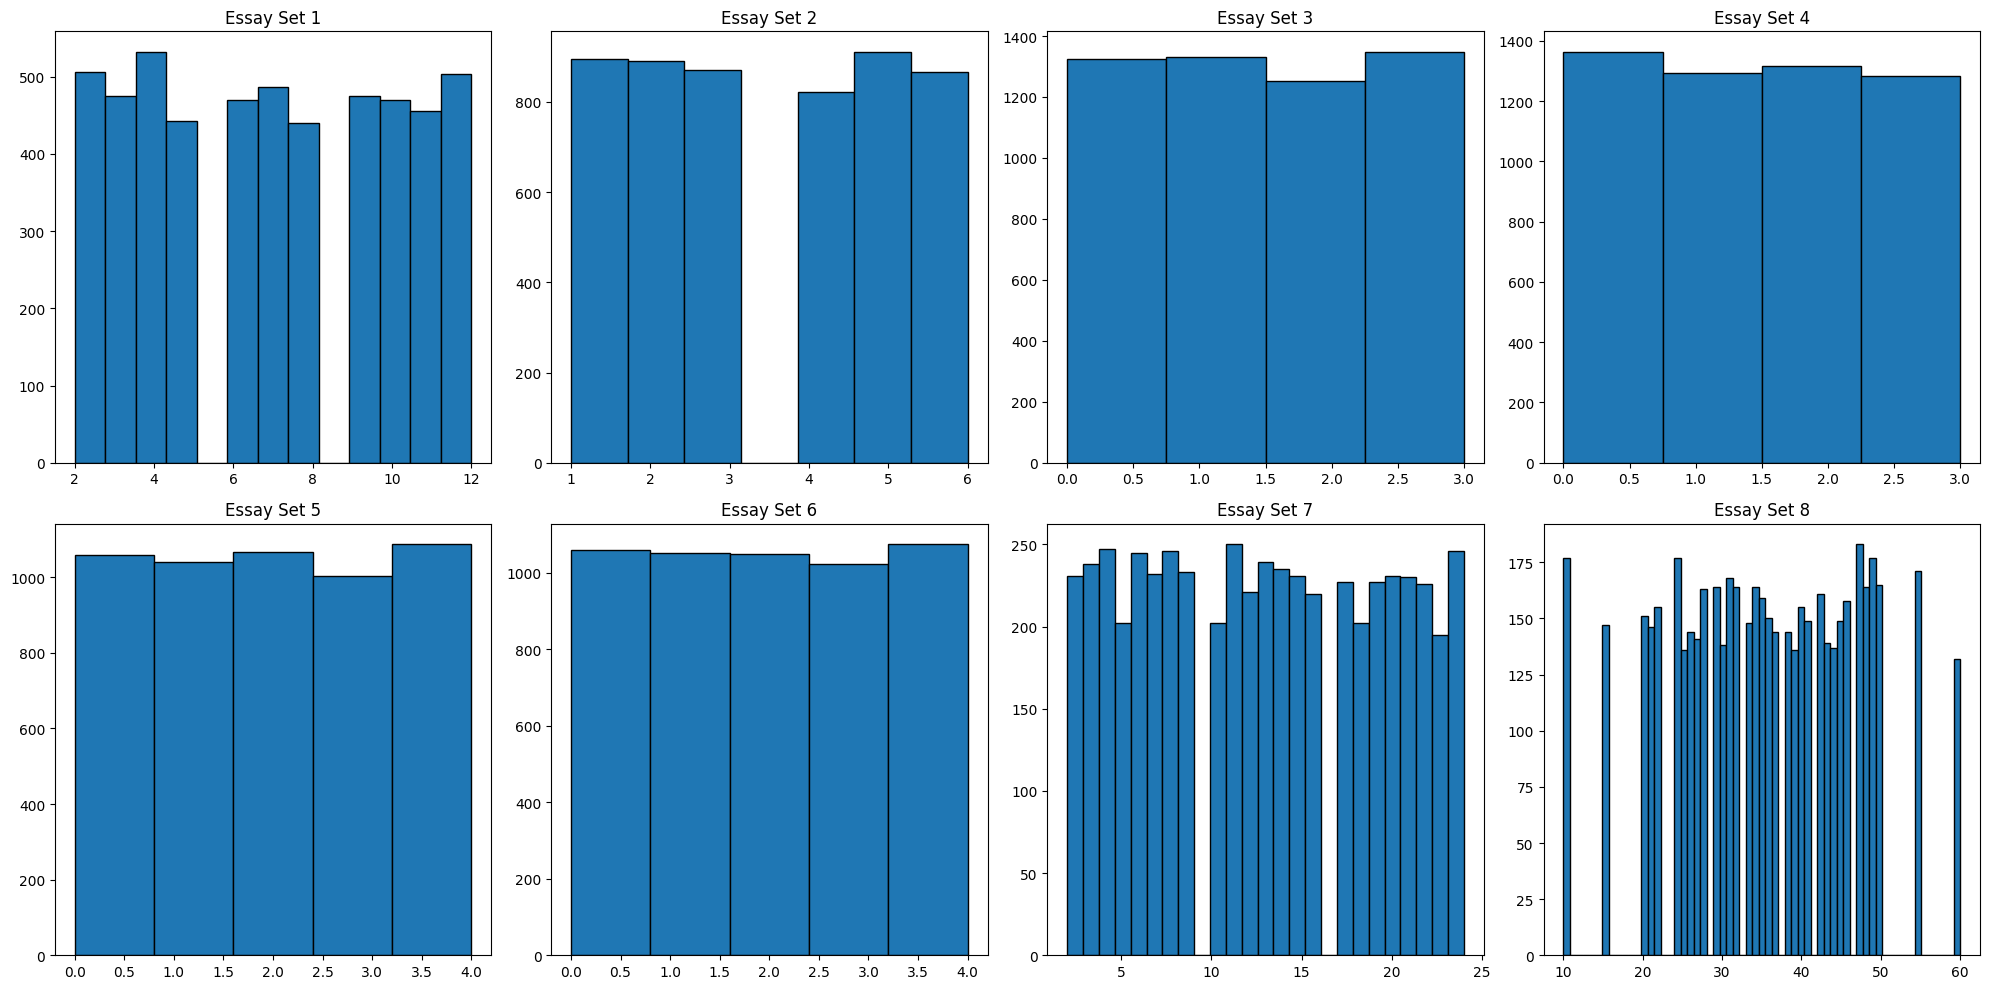

In [15]:
max_scores = df4.groupby('essay_set')['domain1_score'].max()
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, essay_set_value in enumerate(range(1, 9)):
    ax = axs[i // 4, i % 4]
    ax.hist(df4['domain1_score'][df4['essay_set'] == essay_set_value], bins=(max_scores[essay_set_value])+1, edgecolor='black')    
    ax.set_title(f"Essay Set {essay_set_value}")
plt.tight_layout()
plt.show()

ce script crée une figure avec 8 sous-graphiques, chacun montrant un histogramme des scores pour un ensemble d'essais spécifique dans le DataFrame df4, qui contient les données après l'équilibrage des catégories de notes. Cela permet de visualiser la distribution des scores pour chaque ensemble d'essais après l'équilibrage.

In [16]:
score_counts = []
for essay_set_value in df4['essay_set'].unique():
    count = df4['domain1_score'][df4['essay_set'] == essay_set_value].value_counts()
    score_counts.append((essay_set_value, count))
for essay_set_value, count in score_counts:
    print(f"Essay Set {essay_set_value}:\n{count}\n")

Essay Set 3:
3    1348
1    1330
0    1324
2    1254
Name: domain1_score, dtype: int64

Essay Set 2:
5    911
1    895
2    891
3    870
6    866
4    823
Name: domain1_score, dtype: int64

Essay Set 5:
4    1087
2    1066
0    1060
1    1040
3    1003
Name: domain1_score, dtype: int64

Essay Set 1:
4     532
2     506
12    503
7     487
3     475
9     475
6     470
10    470
11    456
5     442
8     440
Name: domain1_score, dtype: int64

Essay Set 6:
4    1074
0    1059
1    1051
2    1050
3    1022
Name: domain1_score, dtype: int64

Essay Set 8:
47    183
49    177
10    177
24    177
55    171
31    168
50    165
48    164
32    164
34    164
29    164
28    163
42    161
35    159
46    158
22    155
40    155
20    151
36    150
45    149
41    149
33    148
15    147
21    146
37    144
38    144
26    144
27    141
43    139
30    138
44    137
25    136
39    136
60    132
Name: domain1_score, dtype: int64

Essay Set 7:
11    250
4     247
8     246
24    246
6     245
13   

Ce script parcourt chaque valeur unique de la colonne 'essay_set' dans le DataFrame df4. 

Pour chaque valeur de 'essay_set', il compte le nombre d'occurrences de chaque valeur de 'domain1_score' associée à cette valeur de 'essay_set'. Ces résultats sont stockés dans une liste appelée score_counts, où chaque élément est un tuple contenant la valeur de 'essay_set' et le compte des valeurs de 'domain1_score'.

Enfin, il imprime les résultats pour chaque ensemble d'essais, affichant ainsi la distribution des scores pour chaque ensemble d'essais dans votre DataFrame df4.

In [17]:
y_test1 = test_data['domain1_predictionid']
y_test1
print("Index of df4:", df4.index)
print("Index of test_data:", test_data.index)
df4.reset_index(drop=True, inplace=True)
df4 = df.sort_values(by='essay_id', ascending=True)
print("Index of df4:", df4.index)
print("Index of test_data:", test_data.index)
df4.head()

Index of df4: Int64Index([33515,  1050, 39064, 41218, 34192,  8497, 10194, 12650, 32285,
             3991,
            ...
            41411, 18014, 24303, 40567, 18848,  4917, 12900, 39577,  2645,
            18357],
           dtype='int64', length=42048)
Index of test_data: RangeIndex(start=0, stop=4254, step=1)
Index of df4: Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            12966, 12967, 12968, 12969, 12970, 12971, 12972, 12973, 12974,
            12975],
           dtype='int64', length=12976)
Index of test_data: RangeIndex(start=0, stop=4254, step=1)


,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
X = df4['essay']
y = df4['domain1_score']
vectorizer = TfidfVectorizer(max_features=10)

# Division des données en ensembles d'entraînement et de test
X_train= vectorizer.fit_transform(X)
X_test = vectorizer.transform(validation_data['essay'])
y_train = y
y_test = validation_data['predicted_score']

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score = model.score(X_train, y_train)
    print('----------------------')
    print("Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R²: {r2}")
    print(f"SCORE: {score}%")
    print('----------------------\n')


Evaluating Linear Regression...
----------------------
Metrics:
MSE: 55.931640014480536
RMSE: 7.4787458851388005
R²: 0.2776341226587401
SCORE: 0.2977183363384066%
----------------------

Evaluating Ridge Regression...
----------------------
Metrics:
MSE: 55.92100012223205
RMSE: 7.478034509296681
R²: 0.2777715385309889
SCORE: 0.2977093858673334%
----------------------

Evaluating Lasso Regression...
----------------------
Metrics:
MSE: 77.4496520975051
RMSE: 8.800548397543478
R²: -0.0002743683665471508
SCORE: 0.0%
----------------------

Evaluating Decision Tree...
----------------------
Metrics:
MSE: 79.90466471688667
RMSE: 8.93894091695916
R²: -0.031981240259170374
SCORE: 0.9997407925171291%
----------------------

Evaluating Support Vector Machine...
----------------------
Metrics:
MSE: 50.02844522870975
RMSE: 7.073078907287105
R²: 0.35387480645481084
SCORE: 0.37351076799697025%
----------------------

Evaluating K-Nearest Neighbors...
----------------------
Metrics:
MSE: 50.11014465


Ce script définit une fonction appelée calculer_vecteur qui prend un texte d'essai en entrée et calcule un vecteur de caractéristiques pour ce texte. Voici un aperçu de ce que fait la fonction :

Tokenisation : Le texte de l'essai est d'abord divisé en mots à l'aide de la fonction nltk.word_tokenize.

Calcul de diverses caractéristiques : La fonction calcule plusieurs caractéristiques basées sur le texte de l'essai, telles que :

Le pourcentage de mots commençant par une majuscule.
Le nombre de mots uniques par rapport au nombre total de mots.
Le nombre de paragraphes.
Le nombre de mots dans l'essai.
Le pourcentage de signes de ponctuation par rapport à la longueur totale de l'essai.
Le pourcentage de mots non reconnus dans le dictionnaire anglais par rapport au nombre total de mots.
Le nombre de phrases dans l'essai.
La longueur moyenne des phrases dans l'essai.
L'utilisation correcte de la ponctuation.
Le pourcentage de mots péjoratifs dans l'essai.
Le nombre de signes de ponctuation par rapport au nombre total de mots.
Le pourcentage d'utilisation excessive de la ponctuation.
Le score de capitalisation.
Le score de style.
Le score d'organisation.

Création du vecteur de caractéristiques : Toutes ces caractéristiques sont regroupées dans un vecteur nommé vecteur_complexite.

En résumé, cette fonction prend un texte d'essai en entrée et calcule un vecteur de caractéristiques qui peut être utilisé pour quantifier divers aspects du texte, tels que la complexité, le style, l'organisation et l'utilisation de la langue.

In [19]:
english_word_set = set(english_words.words())

def calculer_vecteur(essay,df):

    row = df[df['essay'] == essay]
    #essay_id = row['essay_id'].iloc[0]
    #essay_set = row['essay_set'].iloc[0]

    # Tokenisation du texte en mots
    words = nltk.word_tokenize(essay)
    num_words = len(words)

    # Nombre de mots commençant par une majuscule
    capital_words = sum(1 for word in words if word[0].isupper())
    capitalization_score = capital_words / num_words if num_words > 0 else 0
    
    # Nombre de mots uniques
    unique_words_count = len(set(words))
    style_score = unique_words_count / num_words if num_words > 0 else 0
    
    # Nombre de paragraphes
    num_paragraphs = essay.count('\n\n')
    
    # Nombre de caractères de ponctuation
    punctuation_count = sum(1 for char in essay if char in string.punctuation)
    punctuation_score = punctuation_count / len(essay) if len(essay) > 0 else 0
    
    # Score d'orthographe
    orthographe_score = sum(word.lower() not in english_word_set for word in words) / num_words if num_words > 0 else 0
    
    # Calcul du nombre de phrases et de la longueur moyenne des phrases
    sentences = nltk.sent_tokenize(essay)
    num_sentences = len(sentences)
    avg_sentence_length = sum(len(nltk.word_tokenize(sentence)) for sentence in sentences) / num_sentences if num_sentences > 0 else 0
    structure_phrase_score = num_sentences / avg_sentence_length if avg_sentence_length > 0 else 0
    
    # Score de convention (utilisation correcte de la ponctuation)
    conventions_score = (1 - punctuation_score) * 0.5 
    
    # Score de champ lexical
    lexical_richness_score = unique_words_count / num_words if num_words > 0 else 0
    
    # Score d'efficacité des phrases
    sentence_efficiency_score = 1 / structure_phrase_score if structure_phrase_score > 0 else 0
    
    # Nombre de mots considérés comme péjoratifs
    pejorative_terms = {'bad', 'ugly', 'hate', 'stupid'}
    num_pejorative_terms = sum(1 for word in words if word.lower() in pejorative_terms)
    pejorative_term_score = num_pejorative_terms / num_words if num_words > 0 else 0
    
    # Taux d'utilisation excessive de la ponctuation
    overusage_punctuation = punctuation_count / num_words if num_words > 0 else 0
    
    def extraire_mentions(essay):
        mentions = re.findall(r'@(\w+)', essay)
        return mentions
    
    mentions = re.findall(r'@(\w+)', essay)
    nombre_carac_special = len(mentions)

    # Création du vecteur
    vecteur_complexite = [
        #essay_set,
        #essay_id,
        nombre_carac_special,
        num_words,
        punctuation_score,
        orthographe_score,
        structure_phrase_score,
        conventions_score,
        lexical_richness_score,
        sentence_efficiency_score,
        pejorative_term_score,
        punctuation_count,
        overusage_punctuation,
        capitalization_score,
        style_score,
        num_paragraphs
    ]
    return vecteur_complexite

# Exemple d'utilisation de la fonction
essay_exemple = "Censorship is a big controversy in modern society due to the fact of so many opinions being conveyed through all the new medias in the modern world. When a person has a veiw they tend to want to share it with the world or defend it againts those who opose their opinion. Some people do not always like what is being said or take offense in the way it is presented, thus causing the government, or any authority, to remove or replace these words, photos, lyrics, or film from a select public, such as children, or the entire public. This is censorship and it has caused many debates over what is acceptable in society's media.     I believe censorship is wrong. It violates the @CAPS1 peoples' rights of free speach. When a person has an opinion, they have the right to voice it anyway they want. The authorities should not be involved in what someone writes, sings, creates, etc., in anyway. Censorship takes away from the integrity and purity of a human's thoughts.     Who is to say what can and can't be said? Do we just let the government tell us what we can say and what is illegal? Do we stop expressing ourselves in the way we desire because it is not appropriate? No. We, as the people, must be free to say what we want in our stories and songs, along with movies and other media. If a person does not like what they see then they can turn away or they have the right to speak out against it in their own way; but they do not have the right to opress. They should write back, convey their message and try to win support, not control.     Censorship is not good for any society. People want to say whatever they want and they have the right to. Censorship is not a solution to discrimation or anger, it is only a fuel. If parents do not like something and do not want their children to experience it then do not take it from them, then they should tell them how it is 'wrong' and give them their opinion and reasons so the child @MONTH1 descide what they believe in on their own. An opinion is every human being's right and it belongs to them, not the authorities."
vecteur_exemple = calculer_vecteur(essay_exemple,df4)
print("Vecteur caracteristique ", vecteur_exemple)

Vecteur caracteristique  [2, 438, 0.02559150169000483, 0.21232876712328766, 1.0068493150684932, 0.4872042491549976, 0.4315068493150685, 0.9931972789115646, 0.0, 53, 0.12100456621004566, 0.05251141552511415, 0.4315068493150685, 0]


In [20]:
max_features = 1000
vectorizer = TfidfVectorizer(max_features=max_features)
vectorizer.fit(df4['essay'])

def calculer_vecteur_concatene(essay):
    vecteur_texte = calculer_vecteur(essay,df4)
    X = vectorizer.transform([essay])
    vecteur_count = list(X.toarray()[0])
    vecteur_concatene = vecteur_texte + vecteur_count
    
    return vecteur_concatene

# Exemple d'utilisation de la fonction
essay_exemple = "@Alot of things can be found offensive now days, @but that does not mean you take it away from others who enjoy it @use.."
vecteur_exemple_concatene = calculer_vecteur_concatene(essay_exemple)
print("Vecteur concaténé :", len(vecteur_exemple_concatene))

Vecteur concaténé : 1014


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


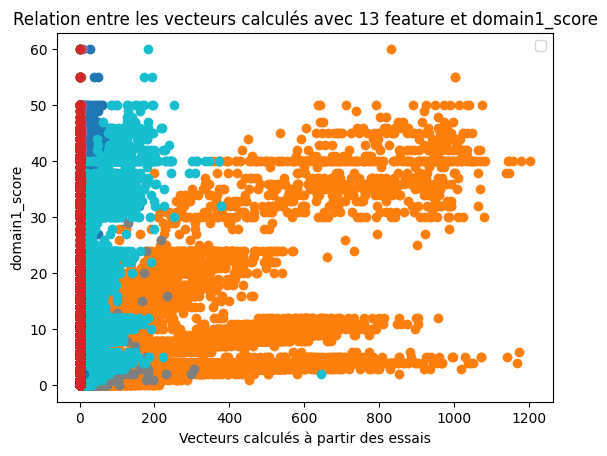

In [24]:
vecteurs = [calculer_vecteur(essai,df4) for essai in df4['essay']]
plt.plot(vecteurs, df4['domain1_score'], 'o')
plt.xlabel('Vecteurs calculés à partir des essais')
plt.ylabel('domain1_score')
plt.title('Relation entre les vecteurs calculés avec 13 feature et domain1_score')
plt.show()

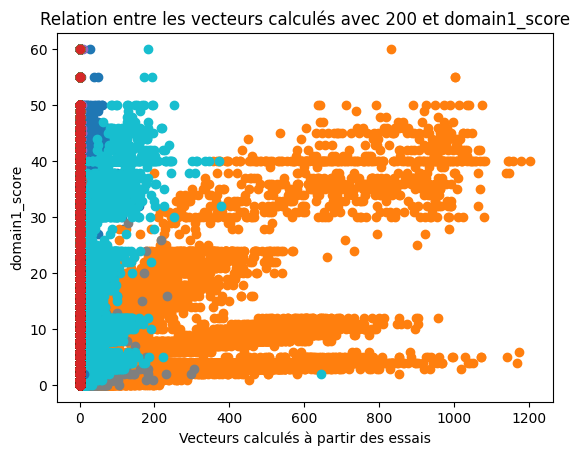

In [25]:
vecteurs = [calculer_vecteur_concatene(essai) for essai in df4['essay']]
plt.plot(vecteurs, df4['domain1_score'], 'o')
plt.xlabel('Vecteurs calculés à partir des essais')
plt.ylabel('domain1_score')
plt.title('Relation entre les vecteurs calculés avec 200 features et domain1_score')
plt.show()

--------------------------------------------------------------------------------------------------------------

In [26]:
def vectorize_essays(data):
    vectors = []
    for essay in data['essay']:
        vector = calculer_vecteur(essay,df4)
        vectors.append(vector)
    return np.array(vectors)

X_train = vectorize_essays(df4)
X_test = vectorize_essays(validation_data)

y_train = df4['domain1_score']
y_test = validation_data['predicted_score']

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    score = model.score(X_train, y_train)
    print('----------------------')
    print("Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R²: {r2}")
    print(f"SCORE: {score}%")
    print('----------------------\n')


Evaluating Linear Regression...
----------------------
Metrics:
MSE: 37.02915554670606
RMSE: 6.085158629543363
R²: 0.5217626655185299
SCORE: 0.5083940344780875%
----------------------

Evaluating Ridge Regression...
----------------------
Metrics:
MSE: 38.94405842214674
RMSE: 6.240517480317377
R²: 0.49703139543092145
SCORE: 0.4837655736059332%
----------------------

Evaluating Lasso Regression...
----------------------
Metrics:
MSE: 42.67820988441203
RMSE: 6.532856181212933
R²: 0.44880424535153773
SCORE: 0.42290264596552307%
----------------------

Evaluating Decision Tree...
----------------------
Metrics:
MSE: 50.114358548731325
RMSE: 7.0791495639470225
R²: 0.35276522249166187
SCORE: 0.9999966479726952%
----------------------

Evaluating Support Vector Machine...
----------------------
Metrics:
MSE: 44.492087415558004
RMSE: 6.670238932418989
R²: 0.4253777333837744
SCORE: 0.38400578642873406%
----------------------

Evaluating K-Nearest Neighbors...
----------------------
Metrics:
MS

In [28]:
print(X_train.shape)
print(X_test.shape)

(12976, 14)
(4217, 14)


--------------------------------------------------------------------------------------------------------------

In [29]:
def vectorize_essays(data):
    vectors = []
    for essay in data['essay']:
        vector = calculer_vecteur_concatene(essay)
        vectors.append(vector)
    return vectors

X_train1 = vectorize_essays(df4)
X_test1 = vectorize_essays(validation_data)
y_train1 = df4['domain1_score']
y_test1 = validation_data['predicted_score']

In [31]:
models = {
    "Decision Tree": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    model.fit(X_train1, y_train1) 
    y_pred1 = model.predict(X_test1) 
    mse = mean_squared_error(y_test1, y_pred1)
    r2 = r2_score(y_test1, y_pred1)
    score = model.score(X_train1, y_train1)
    print('----------------------')
    print("Metrics:")
    print(f"MSE: {mse}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"R²: {r2}")
    print(f"SCORE: {score}%")
    print('----------------------\n')

Evaluating Decision Tree...
----------------------
Metrics:
MSE: 9.501541380128053
RMSE: 3.0824570362177073
R²: 0.8772861072306565
SCORE: 0.9999976056947822%
----------------------

Evaluating RandomForestRegressor...


In [ ]:
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    plot_learning_curve(model, X_train1, y_train1, cv=5)
    plt.show()


Evaluating Decision Tree...


KeyboardInterrupt: 

--------------------------------------------------------------------------------------------------------------